In [1]:
'''load config'''

from config import (CSV_DIR, VISUALS_DIR, NUM_TOPICS)
import pandas as pd
import matplotlib.pyplot as plt

Loaded config. Output folders exist already or are created.


#### 1. Topic Distribution Samples

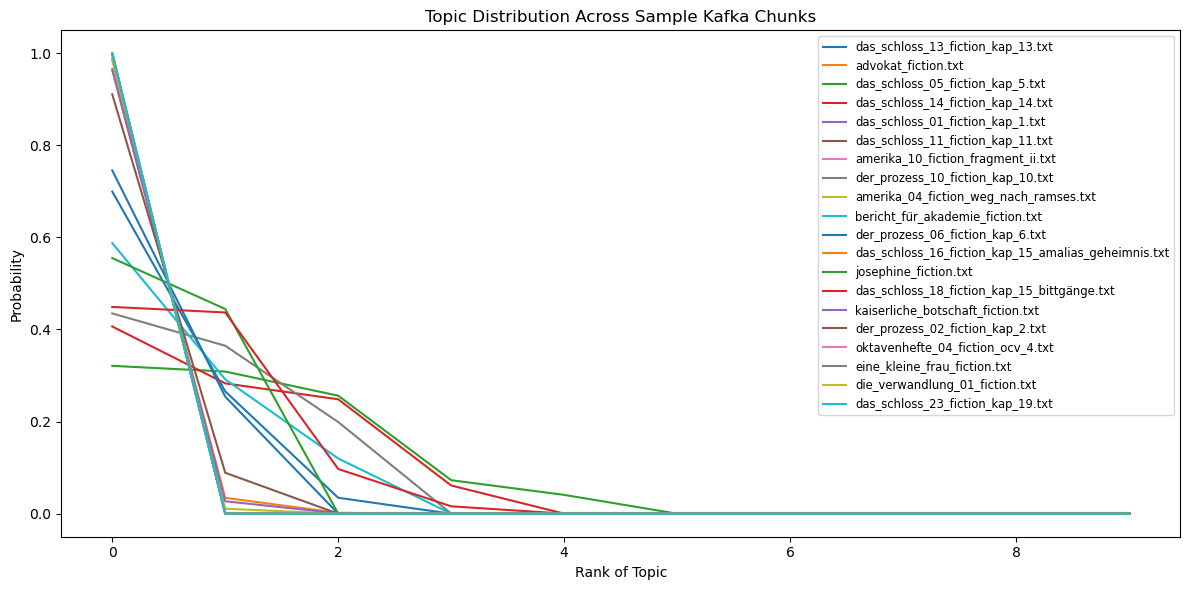

In [2]:
# topic probabilities 
document_topic_distributions = pd.read_csv(CSV_DIR / "document_topic_distributions.csv", index_col=0)

# sampling 20 documents and sorting topic weights by rank
sampled = document_topic_distributions.sample(20, random_state=42)
weights_ordered = sampled.apply(lambda row: row.sort_values(ascending=False).reset_index(drop=True), axis=1)

ax = weights_ordered.T.plot(figsize=(12, 6), legend=True)
ax.legend(sampled.index, loc='upper right', fontsize="small")
ax.set(
    xlabel='Rank of Topic',
    ylabel='Probability',
    title='Topic Distribution Across Sample Kafka Chunks'
)
plt.tight_layout()
plt.savefig(VISUALS_DIR / "kafka_topic_distribution_labeled.png")
plt.show()

#### 2. Dominant Topic Frequency 

In [3]:
# inspecting topic counts
doc_topic_df = pd.read_csv(CSV_DIR / "document_topic_distributions_with_dominant.csv", index_col=0)
# counting how often each topic is dominant
topic_counts = doc_topic_df["dominant_topic"].value_counts().sort_index()
print(topic_counts)

dominant_topic
Topic 0     2
Topic 1     2
Topic 2     2
Topic 3    14
Topic 4     7
Topic 5     5
Topic 6     9
Topic 7    24
Topic 8    12
Topic 9     5
Name: count, dtype: int64


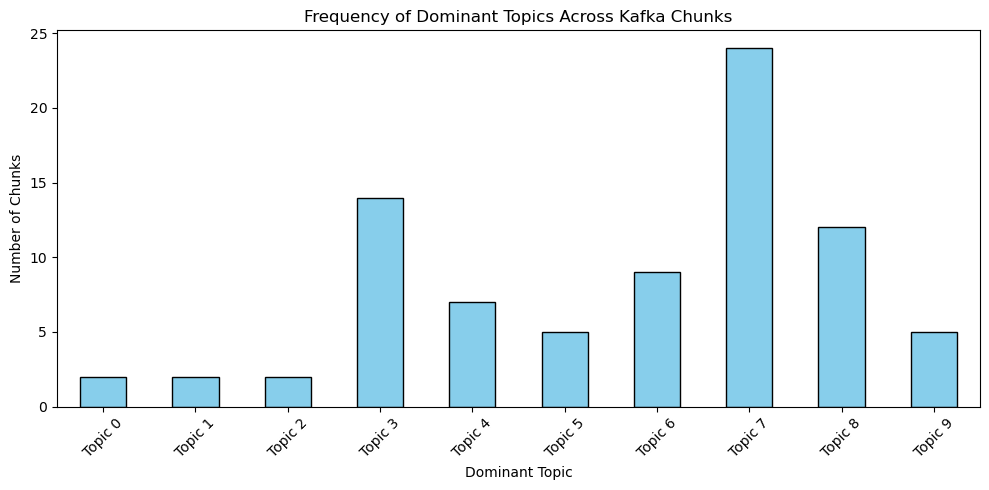

In [10]:
plt.figure(figsize=(10, 5))
topic_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Frequency of Dominant Topics Across Kafka Chunks")
plt.xlabel("Dominant Topic")
plt.ylabel("Number of Chunks")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(VISUALS_DIR / "dominant_topic_frequencies.png")
plt.show()

#### 3. Sorted Dominant Topics 

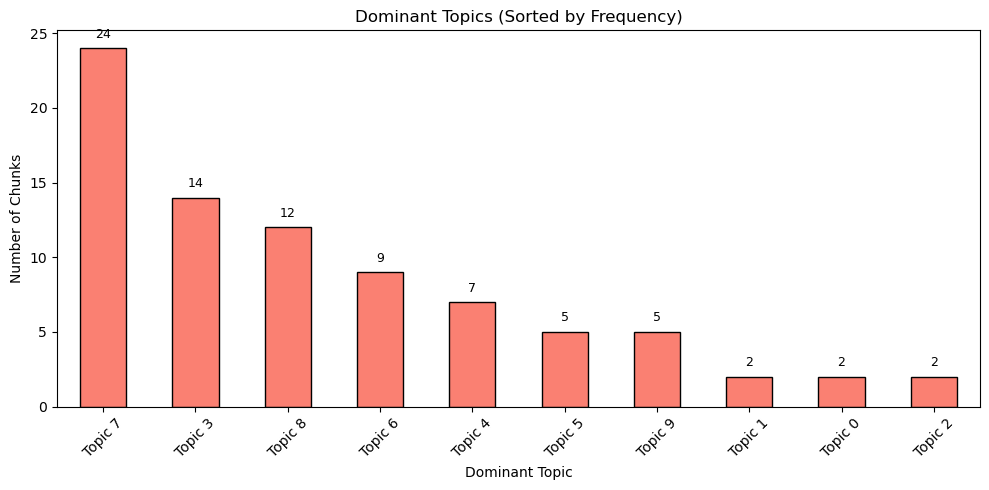

In [7]:
topic_counts_sorted = doc_topic_df["dominant_topic"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ax = topic_counts_sorted.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Dominant Topics (Sorted by Frequency)")
plt.xlabel("Dominant Topic")
plt.ylabel("Number of Chunks")
plt.xticks(rotation=45)
plt.tight_layout()

for i, value in enumerate(topic_counts_sorted.values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.savefig(VISUALS_DIR / "dominant_topics_sorted_annotated.png")
plt.show()

#### 4. Percentage Distribution of Dominant Topics  

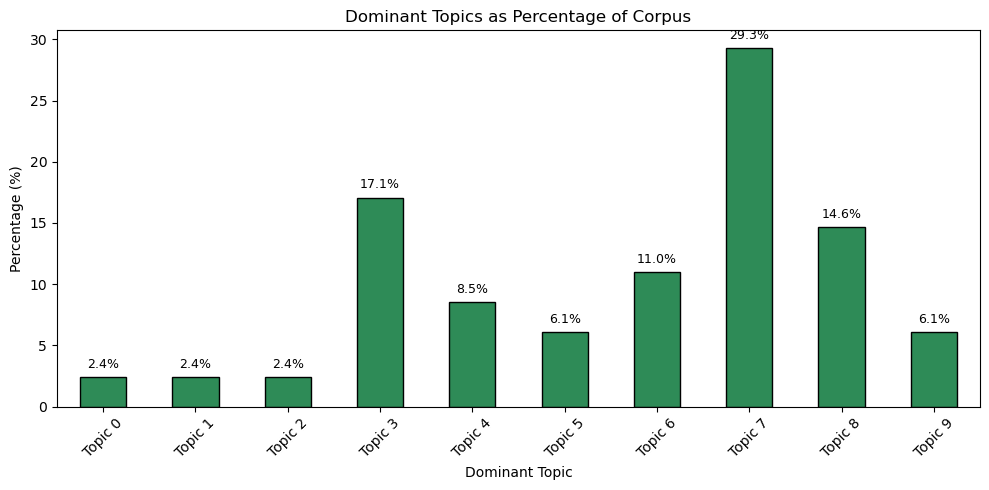

In [9]:
# percentages
topic_counts = doc_topic_df["dominant_topic"].value_counts().sort_index()
topic_percentages = (topic_counts / topic_counts.sum()) * 100

plt.figure(figsize=(10, 5))
ax = topic_percentages.plot(kind="bar", color="seagreen", edgecolor="black")
plt.title("Dominant Topics as Percentage of Corpus")
plt.xlabel("Dominant Topic")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()

for i, value in enumerate(topic_percentages.values):
    ax.text(i, value + 0.5, f"{value:.1f}%", ha='center', va='bottom', fontsize=9)

plt.savefig(VISUALS_DIR / "dominant_topics_percentage_annotated.png")
plt.show()

#### 5. Top Documents per Topic

In [12]:
# Load the document-topic matrix with dominant topic
doc_topic_df = pd.read_csv(CSV_DIR / "document_topic_distributions_with_dominant.csv", index_col=0)

# Drop the 'dominant_topic' column to get only probabilities
topic_probs_only = doc_topic_df.drop(columns=["dominant_topic"])

# Find top 3 documents for each topic
top_docs_per_topic = {}
for topic in topic_probs_only.columns:
    top_docs = topic_probs_only[topic].nlargest(3).index.tolist()
    top_docs_per_topic[topic] = top_docs

# Display results
for topic, docs in top_docs_per_topic.items():
    print(f"\nTop documents for {topic}:")
    for doc in docs:
        print(f" - {doc}")


Top documents for Topic 0:
 - chinesische_mauer_fiction.txt
 - kaiserliche_botschaft_fiction.txt
 - advokat_fiction.txt

Top documents for Topic 1:
 - in_der_strafkolonie_fiction.txt
 - bericht_für_akademie_fiction.txt
 - erstes_leid_fiction.txt

Top documents for Topic 2:
 - das_schloss_23_fiction_kap_19.txt
 - ein_altes_blatt_fiction.txt
 - das_schloss_21_fiction_kap_17.txt

Top documents for Topic 3:
 - der_bau_fiction.txt
 - das_schloss_24_fiction_kap_20.txt
 - das_schloss_22_fiction_kap_18.txt

Top documents for Topic 4:
 - forschunges_eines_hundes_fiction.txt
 - das_schloss_01_fiction_kap_1.txt
 - amerika_09_fiction_fragment_i.txt

Top documents for Topic 5:
 - ein_hungerkünstler_fiction.txt
 - oktavenhefte_08_fiction_ocv_8.txt
 - ein_traum_fiction.txt

Top documents for Topic 6:
 - oktavenhefte_03_fiction_ocv_3.txt
 - oktavenhefte_04_fiction_ocv_4.txt
 - oktavenhefte_01_fiction_ocv_1.txt

Top documents for Topic 7:
 - amerika_03_fiction_ein_landhaus_bei_new_york.txt
 - amerik

####  6. Topic Similarity Heatmap

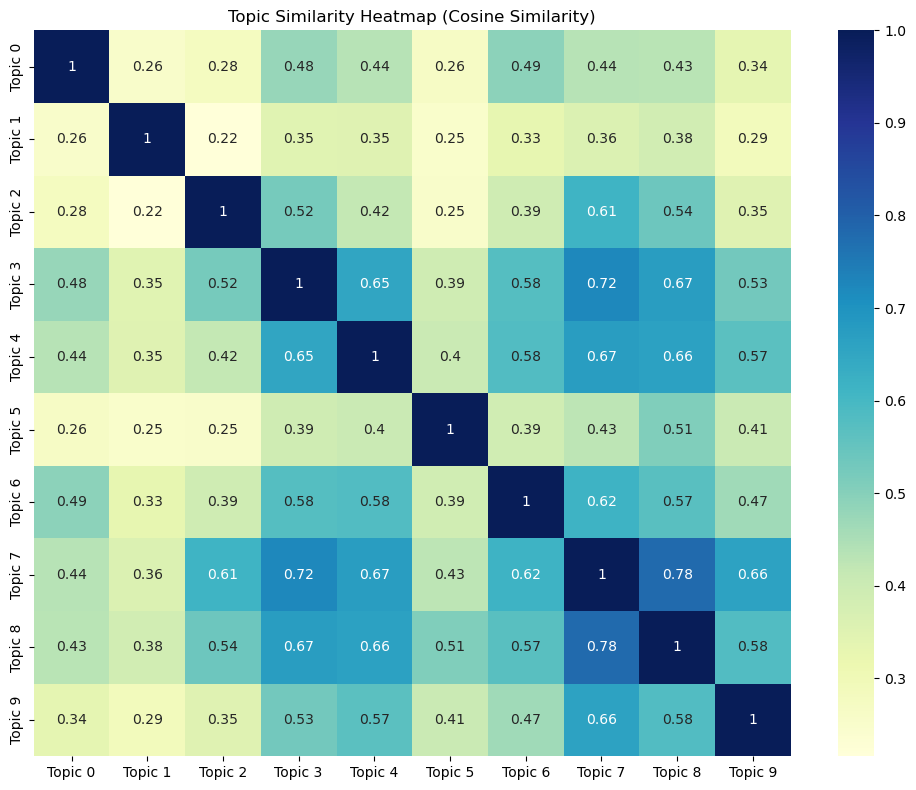

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# topic-word distributions
topic_word_distributions = pd.read_csv(CSV_DIR / "topic_word_distributions.csv", index_col=0)

# cosine similarity between topics
similarity_matrix = cosine_similarity(topic_word_distributions.values)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=topic_word_distributions.index,
            yticklabels=topic_word_distributions.index, annot=True, cmap="YlGnBu")

plt.title("Topic Similarity Heatmap (Cosine Similarity)")
plt.tight_layout()
plt.savefig(VISUALS_DIR / "topic_similarity_heatmap.png")
plt.show()

#### 7. Topic Sparsity

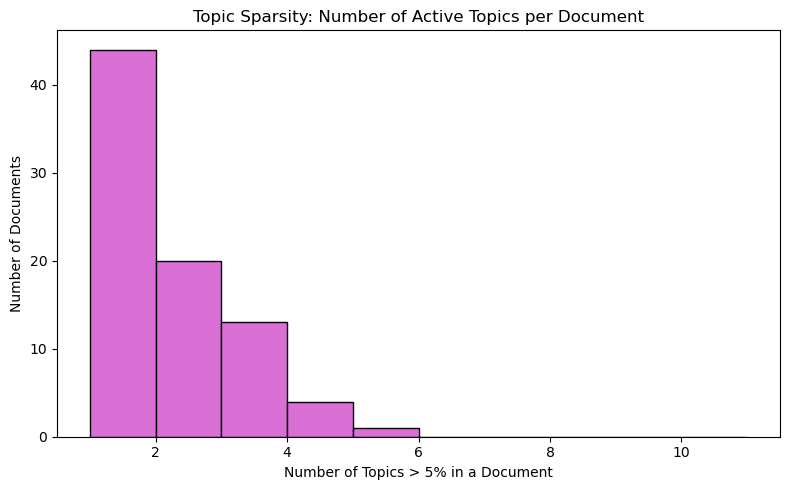

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load document-topic distributions
doc_topic_df = pd.read_csv(CSV_DIR / "document_topic_distributions.csv", index_col=0)

# Define a threshold to consider a topic as "active" in a document
threshold = 0.05

# Count how many topics are above threshold for each document
active_topic_counts = (doc_topic_df > threshold).sum(axis=1)

# Plot histogram
plt.figure(figsize=(8, 5))
active_topic_counts.plot(kind="hist", bins=range(1, NUM_TOPICS + 2), color="orchid", edgecolor="black")
plt.title("Topic Sparsity: Number of Active Topics per Document")
plt.xlabel("Number of Topics > 5% in a Document")
plt.ylabel("Number of Documents")
plt.tight_layout()

plt.savefig(VISUALS_DIR / "topic_sparsity_histogram.png")
plt.show() 

#### 8. Document Entropy

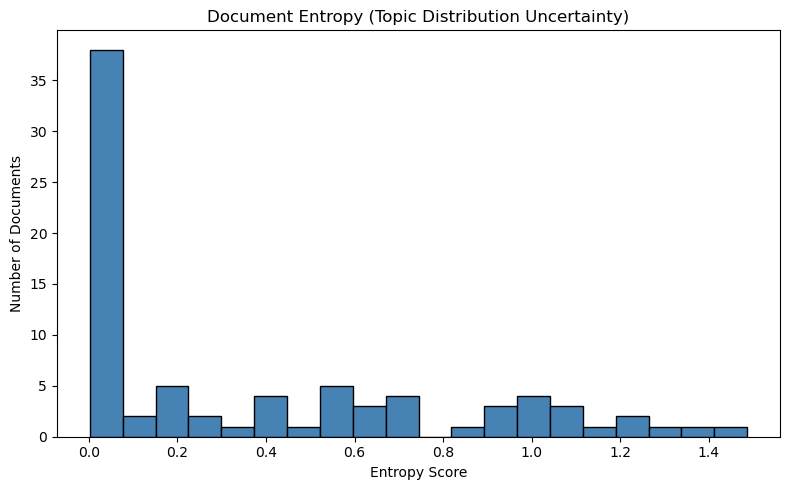

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Load document-topic distribution
doc_topic_df = pd.read_csv(CSV_DIR / "document_topic_distributions.csv", index_col=0)

# Small epsilon to avoid log(0)
epsilon = 1e-12

# Compute entropy for each document
entropy_scores = -np.sum(doc_topic_df * np.log(doc_topic_df + epsilon), axis=1)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(entropy_scores, bins=20, color="steelblue", edgecolor="black")
plt.title("Document Entropy (Topic Distribution Uncertainty)")
plt.xlabel("Entropy Score")
plt.ylabel("Number of Documents")
plt.tight_layout()

plt.savefig(VISUALS_DIR / "document_entropy_histogram.png")
plt.show()

#### 9. Topic Co-occurrence Matrix

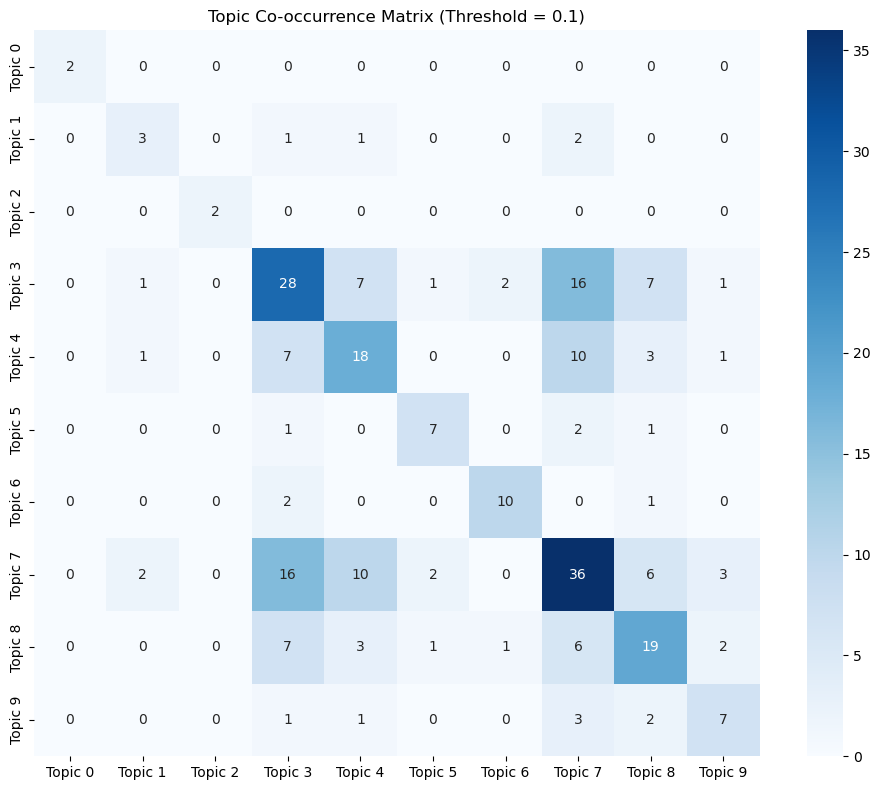

In [18]:
import seaborn as sns

# Reload document-topic distribution
doc_topic_df = pd.read_csv(CSV_DIR / "document_topic_distributions.csv", index_col=0)

# Binarize topic presence: 1 if topic prob > 0.1, else 0
binary_matrix = (doc_topic_df > 0.1).astype(int)

# Compute co-occurrence matrix
co_occurrence = binary_matrix.T.dot(binary_matrix)

# Plot as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="Blues", cbar=True, square=True)
plt.title("Topic Co-occurrence Matrix (Threshold = 0.1)")
plt.tight_layout()

plt.savefig(VISUALS_DIR / "topic_cooccurrence_matrix.png")
plt.show()

#### 10. Word Contribution Histograms for Each Topic

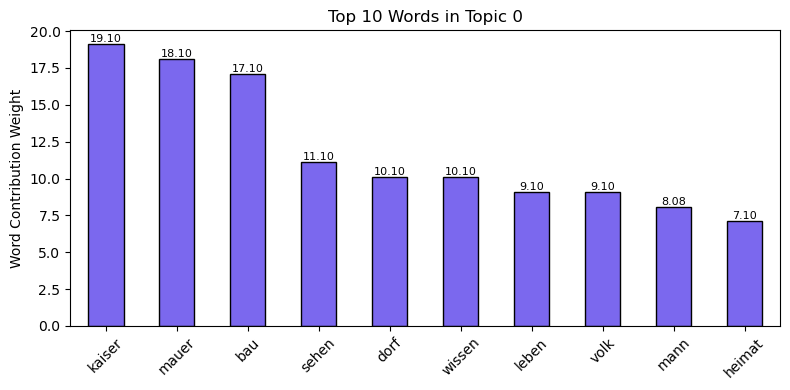

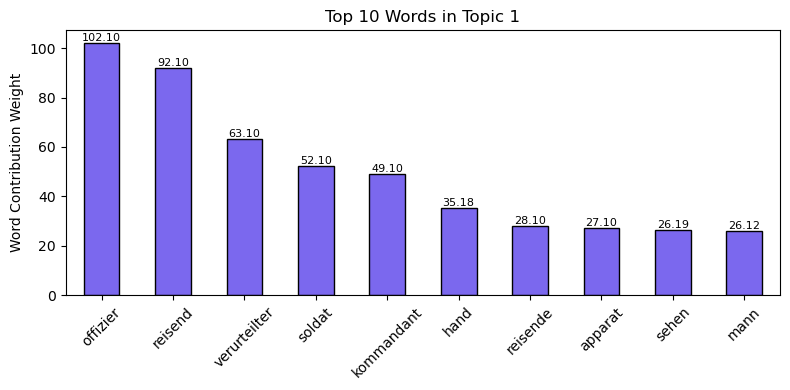

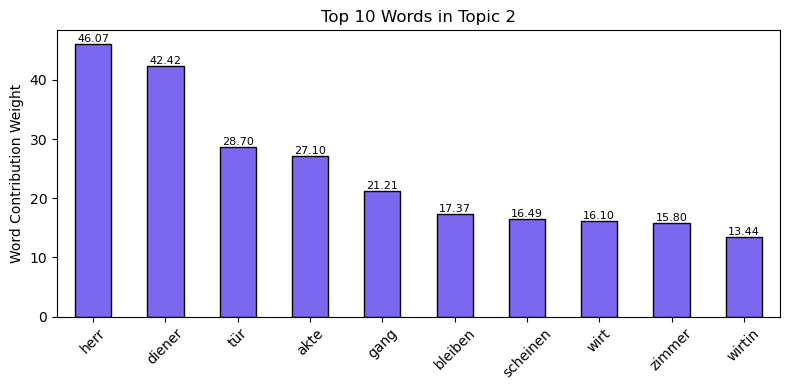

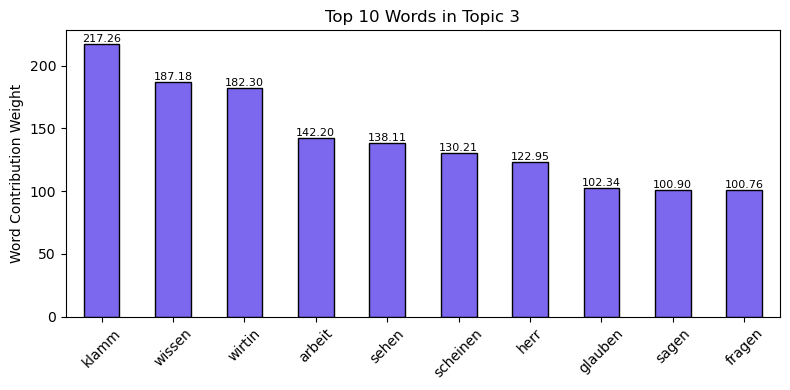

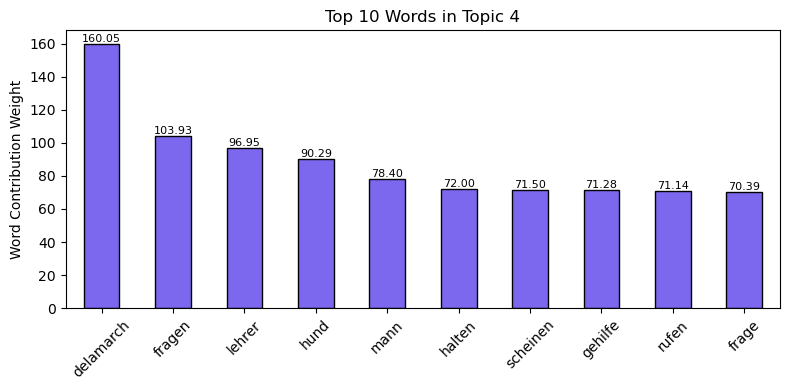

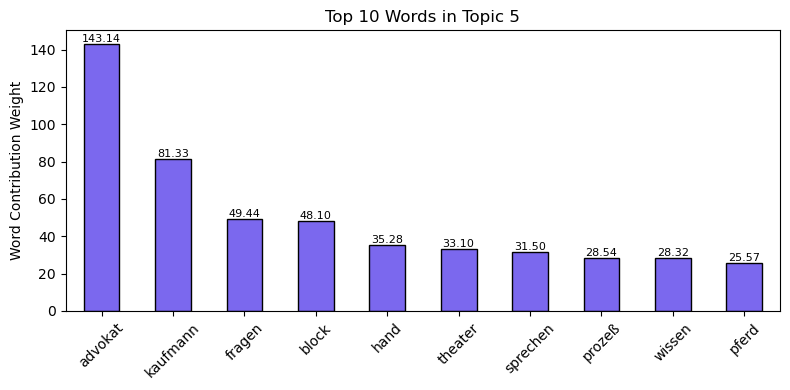

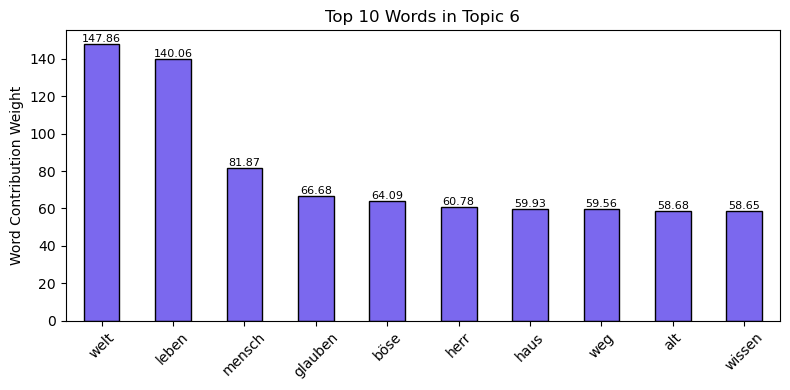

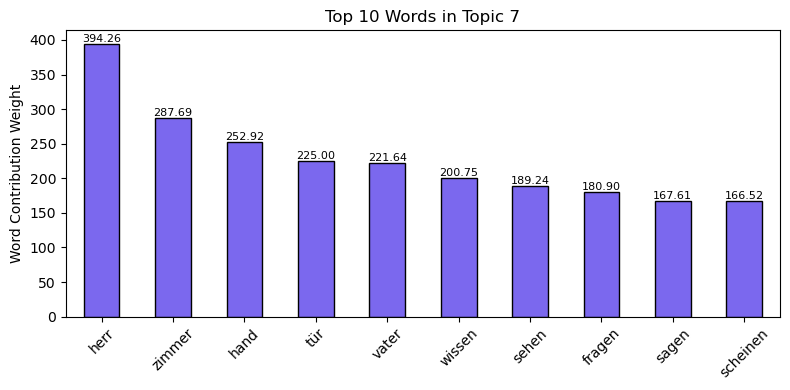

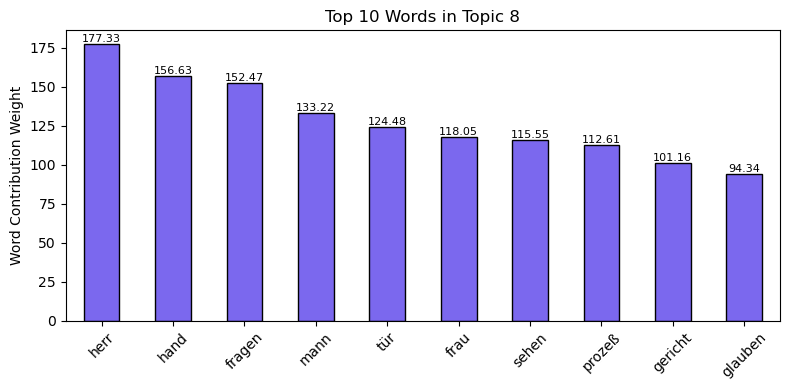

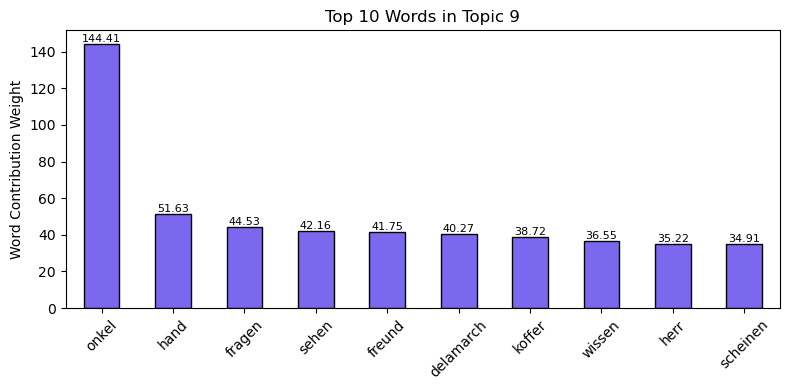

In [19]:
# Load topic-word distribution
topic_word_df = pd.read_csv(CSV_DIR / "topic_word_distributions.csv", index_col=0)

# Plot bar chart for each topic
for topic_name in topic_word_df.index:
    topic_series = topic_word_df.loc[topic_name].sort_values(ascending=False)[:10]

    plt.figure(figsize=(8, 4))
    ax = topic_series.plot(kind="bar", color="mediumslateblue", edgecolor="black")
    plt.title(f"Top 10 Words in {topic_name}")
    plt.ylabel("Word Contribution Weight")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Annotate bars
    for i, value in enumerate(topic_series.values):
        ax.text(i, value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=8)

    # Save
    plt.savefig(VISUALS_DIR / f"{topic_name}_word_contributions.png")
    plt.show()

#### 11. cross-topic word overlap analysis 

In [21]:
import pandas as pd
from collections import Counter

# Load topic-word distributions
topic_word_df = pd.read_csv(CSV_DIR / "topic_word_distributions.csv", index_col=0)

# Get top-N words per topic
top_n = 10
top_words_per_topic = {
    topic: topic_word_df.loc[topic].sort_values(ascending=False).head(top_n).index.tolist()
    for topic in topic_word_df.index
}

# Flatten all top words and count their frequency across topics
all_top_words = [word for words in top_words_per_topic.values() for word in words]
word_topic_counts = Counter(all_top_words)

# Convert to DataFrame
word_overlap_df = pd.DataFrame.from_dict(word_topic_counts, orient='index', columns=["topic_count"])
word_overlap_df = word_overlap_df.sort_values(by="topic_count", ascending=False)

# Show top repeated words
print("Words appearing in many topics:")
display(word_overlap_df.head(15))

# Save to CSV
word_overlap_df.to_csv(CSV_DIR / "word_topic_overlap.csv")

Words appearing in many topics:


,topic_count
herr,6
fragen,6
sehen,6
wissen,6
scheinen,5
hand,5
mann,4
glauben,3
tür,3
leben,2
